In [ ]:
!pip install umap-learn[plot]

In [2]:
#import the required modules for the project

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.cluster import KMeans

import random

import umap

In [3]:
#load the dataset

wine = pd.read_csv("wine.csv")

#show the top 5 rows of the dataset
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#info about the dataset

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
#description of the dataset

wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


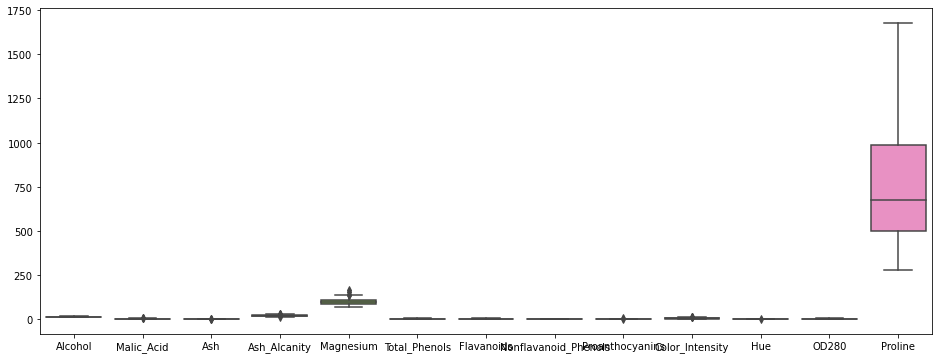

In [6]:
#showing all the features of dataset in the boxplot.

plt.figure(figsize= (16, 6))
sns.boxplot(data = wine)

In [7]:
#to check for any duplicated values

wine.duplicated().sum()

0

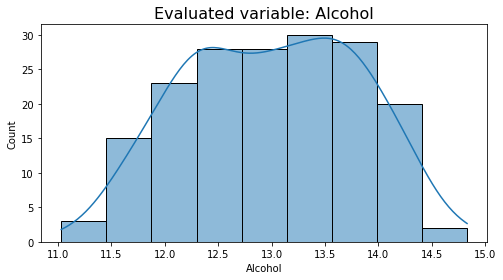

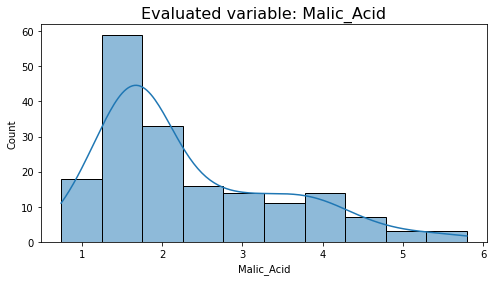

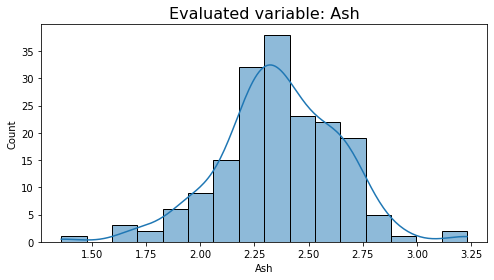

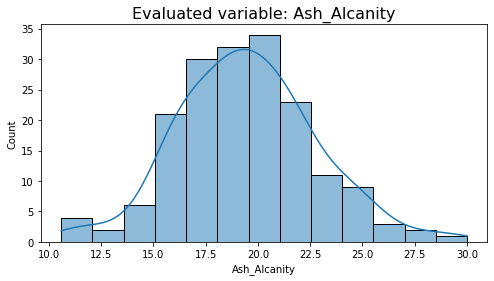

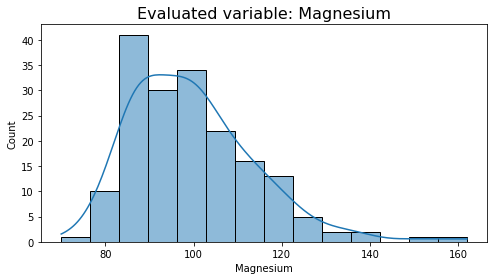

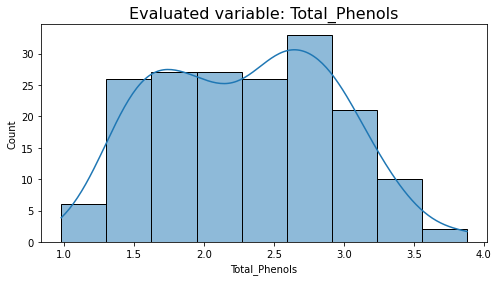

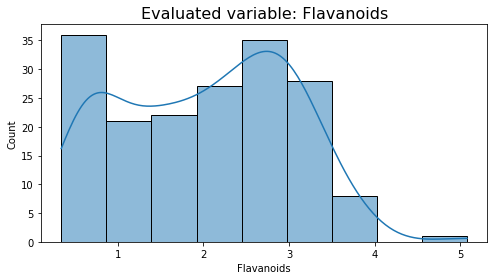

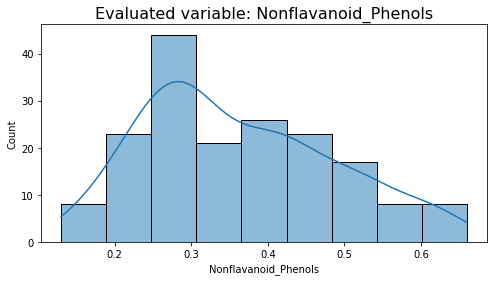

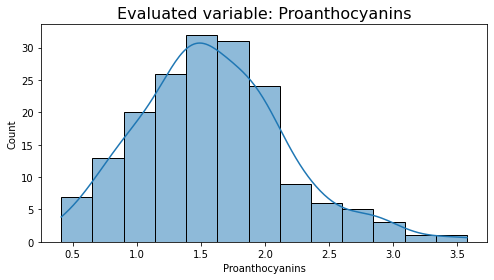

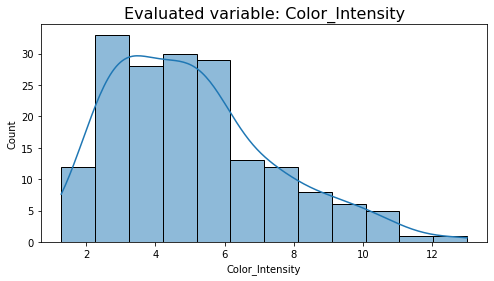

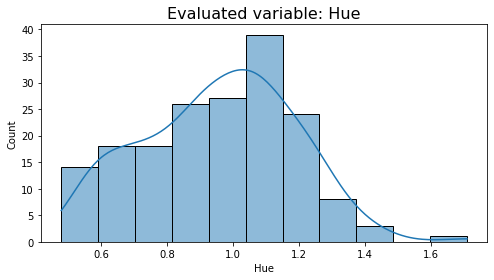

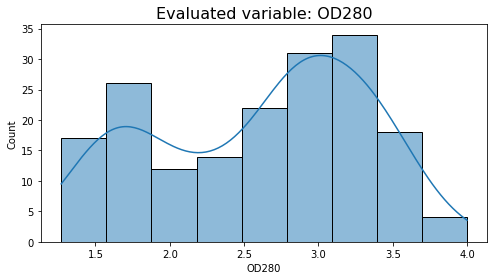

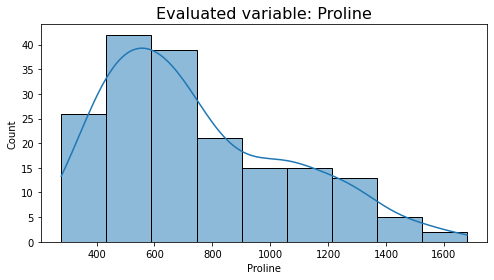

In [8]:
#graphs showing variable distributions

for c in wine.columns:
  plt.figure(figsize= (8, 4))
  plt.title(f"Evaluated variable: {c}", fontsize = 16)
  sns.histplot(wine[c], kde= True)

In [9]:
#standardizing the data

new_wine = StandardScaler().fit_transform(wine)
new_wine = PowerTransformer(standardize = False).fit_transform(new_wine)

In [10]:
#making a new dataframe from the standardized data and columns from the original dataset

new_wine = pd.DataFrame(data = new_wine, columns = wine.columns)
new_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.552972,-0.702436,0.233769,-1.224710,1.378174,0.796708,1.043661,-0.729831,1.093141,0.235133,0.363665,2.262034,0.793386
1,0.247472,-0.610198,-0.809540,-2.696922,0.018056,0.562211,0.738364,-0.926936,-0.578400,-0.317844,0.407900,1.278188,0.762788
2,0.197645,0.021031,1.141607,-0.272253,0.086325,0.796708,1.227314,-0.539574,1.802679,0.250223,0.319467,0.875251,1.022728
3,1.732995,-0.400457,0.495037,-0.837478,0.767296,2.405004,1.482916,-1.130495,0.934182,0.921471,-0.425517,1.368576,1.500126
4,0.297382,0.207225,1.919073,0.442690,1.001563,0.796708,0.667285,0.218295,0.383679,-0.348242,0.363665,0.479405,-0.038337


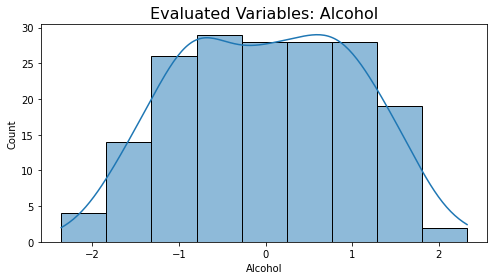

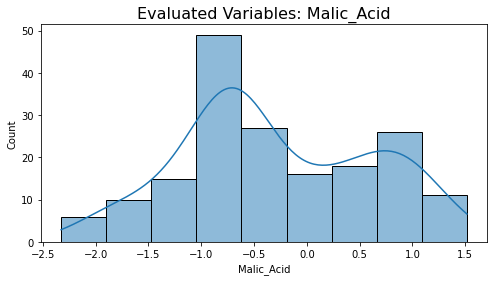

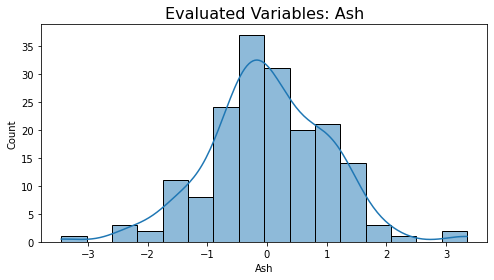

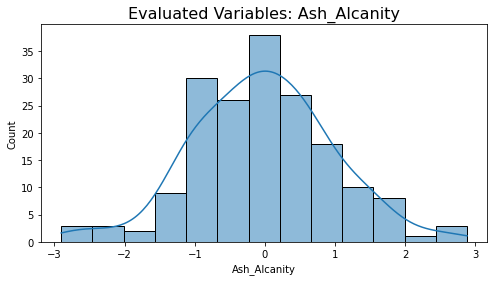

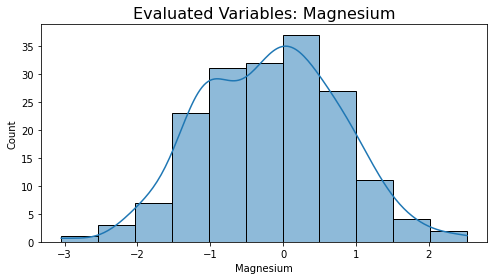

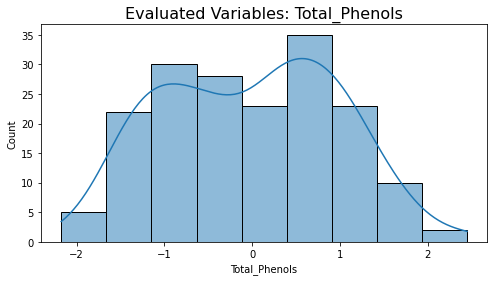

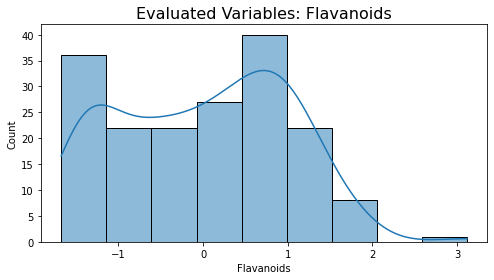

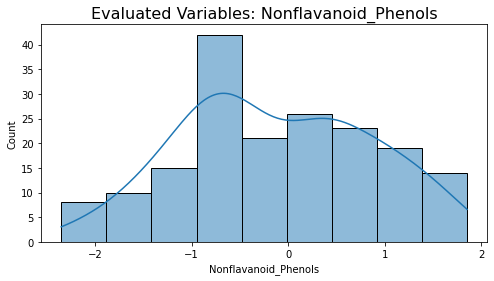

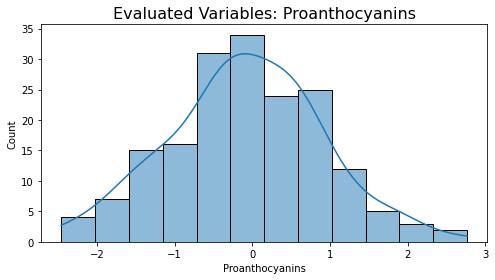

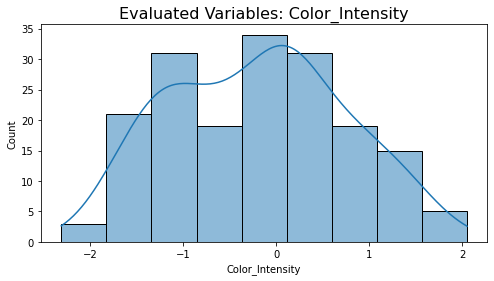

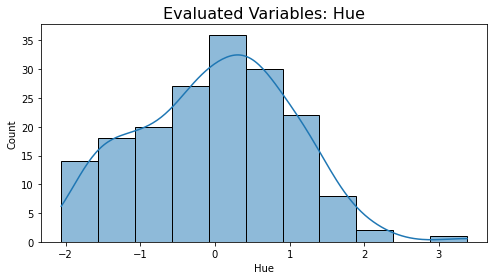

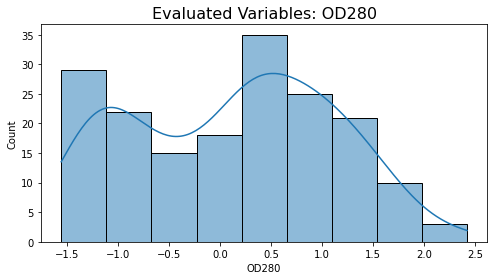

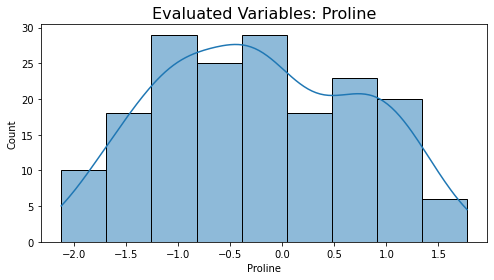

In [11]:
for c in new_wine.columns:
  plt.figure(figsize= (8, 4))
  plt.title(f"Evaluated Variables: {c}" , fontsize = 16)
  sns.histplot(new_wine[c], kde = True)

In [12]:
#finding the inertia of the dataframe with different number of clusters

fixed_random_state = random.seed(42)

inertia_1 = []

range_cluster = np.arange(2, 10, dtype = int)

for n in range_cluster:
  kmeans = KMeans(n_clusters = n, random_state = fixed_random_state).fit(new_wine)
  inertia_1.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

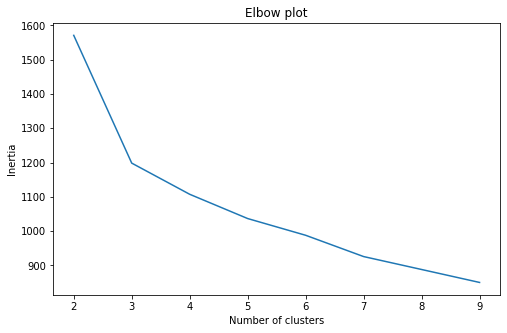

In [13]:
fig, axes = plt.subplots(figsize = (8, 5))

sns.lineplot(x = range_cluster, y = inertia_1)

plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [14]:
#after observing the above elbow plot. Let's take n_clusters = 3

label_1 = KMeans(n_clusters = 3, random_state = fixed_random_state).fit_predict(new_wine)

In [15]:
#reducing the dimensions of the dataset to visualise it

reducer = umap.UMAP(n_components = 2, n_neighbors = 15, n_jobs= -1, random_state = fixed_random_state)
embedding = reducer.fit_transform(new_wine)

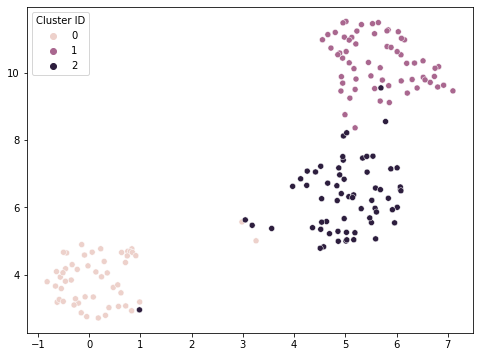

In [16]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue = label_1)
plt.legend(title= "Cluster ID")
plt.show()

In [17]:
#importing PCA

from sklearn.decomposition import PCA

In [18]:
#checking which is the best n_component 

pca = PCA(n_components = 10, random_state = fixed_random_state).fit(new_wine)

pc = np.arange(pca.n_components_, dtype = int) + 1

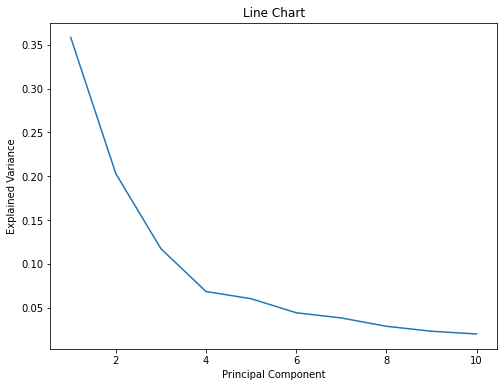

In [19]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = pc, y = pca.explained_variance_ratio_)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Line Chart")
plt.show()

In [20]:
#after observing the above line graph taking n_components = 4

new_wine_2 = PCA(n_components = 4, random_state = fixed_random_state).fit_transform(new_wine)

new_wine_2 = pd.DataFrame(data = new_wine_2, columns = ["pc1", "pc2", "pc3", "pc4"])

new_wine_2.head()

,pc1,pc2,pc3,pc4
0,-3.361355,-1.335128,-0.241050,0.034622
1,-2.232559,0.183505,-2.117771,-0.314983
2,-2.361378,-1.061396,1.076760,0.495528
3,-3.661182,-2.383114,-0.072985,0.715901
4,-0.977118,-1.100360,2.028880,-0.459807


In [21]:
#taking inertia on the new dataframe made by using PCA

inertia_2 = []

range_clusters_2 = np.arange(2, 10, dtype= int)

for n in range_clusters_2:
  kmeans_2 = KMeans(n_clusters = n, random_state = fixed_random_state).fit(new_wine_2)
  inertia_2.append(kmeans_2.inertia_)

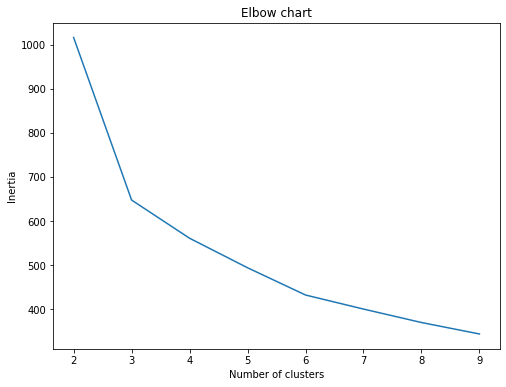

In [22]:
#checking for the best n_clusters

plt.figure(figsize = (8, 6))
sns.lineplot(x = range_clusters_2, y = inertia_2)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow chart")
plt.show()

In [23]:
#selecting n_clusters = 3, after observing the above elbow chart

label_2 = KMeans(n_clusters = 3, random_state = fixed_random_state).fit_predict(new_wine_2)

In [24]:
#reducing the dimensions of the dataset, so that the data can be visualise easily

reducer_2 = umap.UMAP(n_components = 3, n_neighbors = 15, n_jobs = -1, random_state = fixed_random_state)

embedding_2 = reducer_2.fit_transform(new_wine_2)

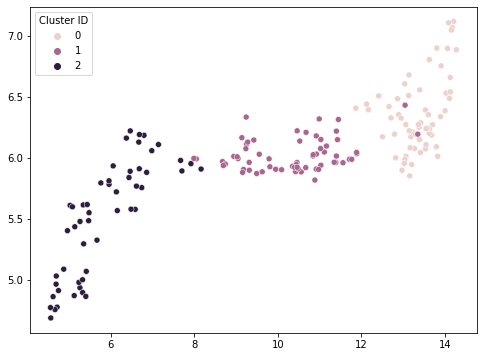

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=label_2)
plt.legend(title="Cluster ID")
plt.show()

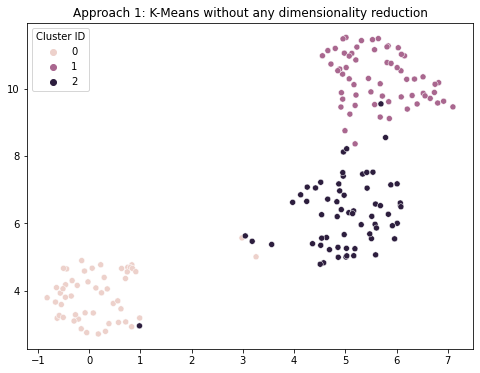

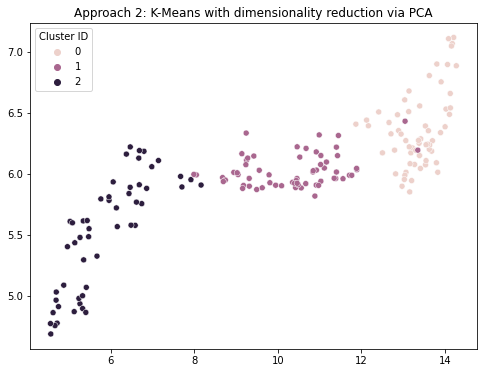

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=label_1)
plt.title("Approach 1: K-Means without any dimensionality reduction")
plt.legend(title="Cluster ID")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=label_2)
plt.title("Approach 2: K-Means with dimensionality reduction via PCA")
plt.legend(title="Cluster ID")
plt.show()